## Entrenar una red neuronal para que aprenda a reconocer la teorema de pitagoras apartir de dos catetos

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers, models
import matplotlib.pyplot as plt

Generacion de datos

In [2]:
def generar_datos(num_ejemplos):
    a = np.random.uniform(0,10,num_ejemplos)
    b = np.random.uniform(0,10,num_ejemplos)
    c = np.sqrt(a**2 + b**2)
    return np.column_stack((a,b)), c


Generar los datos de Entrenamiento

In [3]:
num_ejemplos = 100000
train_data, train_labels = generar_datos(num_ejemplos)
test_data, test_labels = generar_datos(int(num_ejemplos * 0.2))

Construccion del modelo

In [4]:
model = models.Sequential([
    layers.Dense(64,activation='relu',input_shape=(2,)),
    layers.Dense(64,activation='relu'),
    layers.Dense(1) #El valor de la hipotenusa
])

c:\Users\Estudiante\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compilacion del modelo

In [5]:
model.compile(optimizer='adam', loss='mse')#mean saquarter error

dEntrenamos el modelo de red neuronal

In [6]:
historial=model.fit(train_data,train_labels,epochs=20,batch_size=32,validation_data=(test_data,test_labels))

Epoch 1/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 3s 758us/step - loss: 0.4107 - val_loss: 4.0914e-05
Epoch 2/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2s 754us/step - loss: 3.3307e-05 - val_loss: 1.3942e-05
Epoch 3/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2s 754us/step - loss: 1.3986e-04 - val_loss: 5.6858e-05
Epoch 4/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2s 740us/step - loss: 1.5635e-04 - val_loss: 1.8171e-05
Epoch 5/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2s 743us/step - loss: 1.8596e-04 - val_loss: 3.8328e-04
Epoch 6/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2s 738us/step - loss: 1.1684e-04 - val_loss: 2.7554e-05
Epoch 7/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2s 761us/step - loss: 1.2451e-04 - val_loss: 3.3570e-05
Epoch 8/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2s 743us/step - loss: 1.0139e-04 - val_loss: 6.1892e-06
Epoch 9/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2s 733us/step - loss: 1.1548e-04 - val_loss: 2.5135e-05
Epoch 10/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2s 742us/step - loss: 8.2124e-05 - val_loss: 7.5563e-06
Epoch 11/20
3125/3125 ━

Graficamos el historial de entrenamiemto

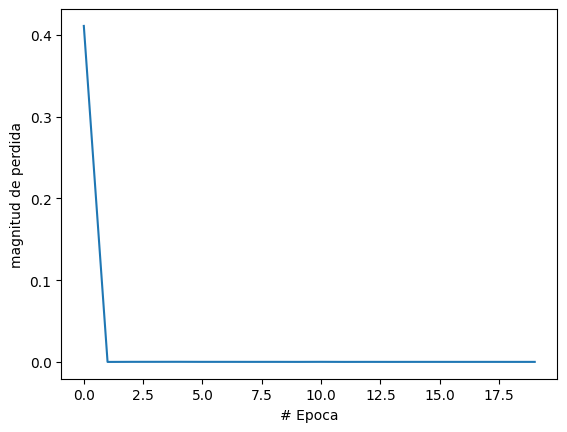

In [7]:
plt.xlabel('# Epoca')
plt.ylabel('magnitud de perdida')
plt.plot(historial.history['loss'])

Evaluacion del modelo

In [8]:
test_loss = model.evaluate(test_data, test_labels)
print(f"Perdida en el conjunto de prueba: {test_loss}")

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 6.2371e-05  
Perdida en el conjunto de prueba: 6.237142952159047e-05


Prediccion del teorema de pitagoras con otros datos

In [9]:
nuevos_datos = np.array([[3, 4],[6,8],[25,60]])
hipotenusa_pred = model.predict(nuevos_datos)
print (f'Hipotenusa predecida: {hipotenusa_pred}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Hipotenusa predecida: [[ 4.993968]
 [ 9.989686]
 [64.90329 ]]
